In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import datetime
import seaborn as sns

import time
import operator

# 그래프 설정
plt.rcParams['font.family'] = 'Malgun Gothic'
# plt.rcParams['font.family'] = 'AppleGothic'
plt.rcParams['font.size'] = 10
plt.rcParams['figure.figsize'] = 10, 8
plt.rcParams['axes.unicode_minus'] = False

# 경고 무시
import warnings
warnings.filterwarnings('ignore')

### MovieLens 데이터 살펴보기

In [2]:
# 평점 데이터를 읽어온다.
# 파일 확장자가 csv가 아닌 파일에서 데이터를 읽어올 경우에
# pd.io.parsers를 사용한다.

rating_data = pd.io.parsers.read_csv('data10/ml-1m/ratings.dat',
                        names=['user_id', 'movie_id', 'rating', 'time'],
                        delimiter='::')

rating_data.head()

,user_id,movie_id,rating,time
0,1,1193,5,978300760
1,1,661,3,978302109
2,1,914,3,978301968
3,1,3408,4,978300275
4,1,2355,5,978824291


In [3]:
# 영화 데이터를 읽어온다.
movie_data = pd.io.parsers.read_csv('data10/ml-1m/movies.dat',
                                   names=['movie_id', 'title', 'genre'],
                                   delimiter='::')

movie_data.head()

,movie_id,title,genre
0,1,Toy Story (1995),Animation|Children's|Comedy
1,2,Jumanji (1995),Adventure|Children's|Fantasy
2,3,Grumpier Old Men (1995),Comedy|Romance
3,4,Waiting to Exhale (1995),Comedy|Drama
4,5,Father of the Bride Part II (1995),Comedy


In [4]:
# 유저 정보 데이터를 읽어온다.
user_data = pd.io.parsers.read_csv('data10/ml-1m/users.dat',
                                  names=['user_id','gender','age','occupation','zipcode'],
                                  delimiter='::')

user_data.head()

,user_id,gender,age,occupation,zipcode
0,1,F,1,10,48067
1,2,M,56,16,70072
2,3,M,25,15,55117
3,4,M,45,7,02460
4,5,M,25,20,55455


---

#### 데이터 정보확인

In [5]:
rating_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000209 entries, 0 to 1000208
Data columns (total 4 columns):
 #   Column    Non-Null Count    Dtype
---  ------    --------------    -----
 0   user_id   1000209 non-null  int64
 1   movie_id  1000209 non-null  int64
 2   rating    1000209 non-null  int64
 3   time      1000209 non-null  int64
dtypes: int64(4)
memory usage: 30.5 MB


In [6]:
movie_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3883 entries, 0 to 3882
Data columns (total 3 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   movie_id  3883 non-null   int64 
 1   title     3883 non-null   object
 2   genre     3883 non-null   object
dtypes: int64(1), object(2)
memory usage: 91.1+ KB


In [7]:
user_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6040 entries, 0 to 6039
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   user_id     6040 non-null   int64 
 1   gender      6040 non-null   object
 2   age         6040 non-null   int64 
 3   occupation  6040 non-null   int64 
 4   zipcode     6040 non-null   object
dtypes: int64(3), object(2)
memory usage: 236.1+ KB


---

#### 결측치 확인

In [8]:
rating_data.isna().sum()

user_id     0
movie_id    0
rating      0
time        0
dtype: int64

In [9]:
movie_data.isna().sum()

movie_id    0
title       0
genre       0
dtype: int64

In [10]:
user_data.isna().sum()

user_id       0
gender        0
age           0
occupation    0
zipcode       0
dtype: int64

---

### 데이터 분석

#### 분석할 영화의 정보 탐색하기

In [11]:
# 전체 영화 데이터 로우의 개수
print(f'전체 영화 데이터 로우의 개수 : {len(movie_data)}')

# movie_id가 중복된 것을 제거한 개수
print(f'중복 제외한 영화의 개수 : {len(movie_data["movie_id"].unique())}')

전체 영화 데이터 로우의 개수 : 3883
중복 제외한 영화의 개수 : 3883


In [12]:
# 전체 영화의 개수
print(f'전체 영화의 개수 : {len(movie_data)}')

전체 영화의 개수 : 3883


In [13]:
# 년도별 영화 수를 가져온다
movie_data['year'] = movie_data['title'].apply(lambda x :x [-5:-1])
movie_data['year'].value_counts().sort_index()

1919      3
1920      2
1921      1
1922      2
1923      3
       ... 
1996    345
1997    315
1998    337
1999    283
2000    156
Name: year, Length: 81, dtype: int64

In [14]:
# 각 영화의 연대별 개수를 가져오세요
# 연대별 년도값을 담을 컬럼의 이름은 year_term
movie_data['year_term'] = movie_data['year'].apply(lambda x : x[:3] + '0')
movie_year_term = movie_data['year_term'].value_counts().sort_index()
movie_year_term

1910       3
1920      34
1930      77
1940     126
1950     168
1960     191
1970     247
1980     598
1990    2283
2000     156
Name: year_term, dtype: int64

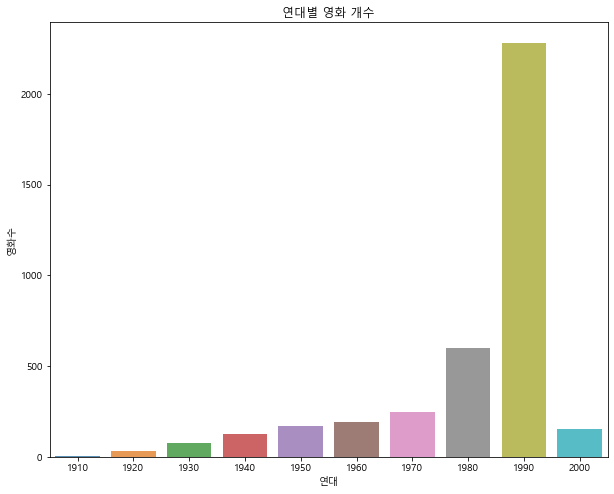

In [15]:
sns.barplot(movie_year_term.index,movie_year_term.values, alpha=0.8 )
plt.title('연대별 영화 개수')
plt.xlabel('연대')
plt.ylabel('영화수')
plt.show()

---

#### 장르별 속성 탐색

In [16]:
# 가장 많이 사용된 장르의 조합을 출력한다.
movie_data['genre'].value_counts()

Drama                                 843
Comedy                                521
Horror                                178
Comedy|Drama                          162
Comedy|Romance                        142
                                     ... 
Adventure|Fantasy                       1
Action|Adventure|Drama|Romance          1
Animation|Children's|Drama|Fantasy      1
Action|Thriller|War                     1
Action|Crime|Mystery                    1
Name: genre, Length: 301, dtype: int64

In [17]:
# 가장 많이 등장한 장르의 속성을 추출한다.
# 장르들을 담을 딕셔너리
unique_genre_dict = {}

# 영화의 수 만큼 반복하면서 장르를 추출한다.
for row in movie_data['genre']:
    # print(row)
    # | 를 기준으로 문자열을 잘라준다.
    parsed_genre = row.split('|')
       
    for genre_name in parsed_genre:
        # print(genre_name)
        # 해당 장르로 저장된 것이 없다면
        if unique_genre_dict.get(genre_name) == None:
            unique_genre_dict[genre_name] = 1
        
        # 해당 장르로 저장된 것이 있다면
        else:
            unique_genre_dict[genre_name] = unique_genre_dict[genre_name] + 1

print(unique_genre_dict)

{'Animation': 105, "Children's": 251, 'Comedy': 1200, 'Adventure': 283, 'Fantasy': 68, 'Romance': 471, 'Drama': 1603, 'Action': 503, 'Crime': 211, 'Thriller': 492, 'Horror': 343, 'Sci-Fi': 276, 'Documentary': 127, 'War': 143, 'Musical': 114, 'Mystery': 106, 'Film-Noir': 44, 'Western': 68}


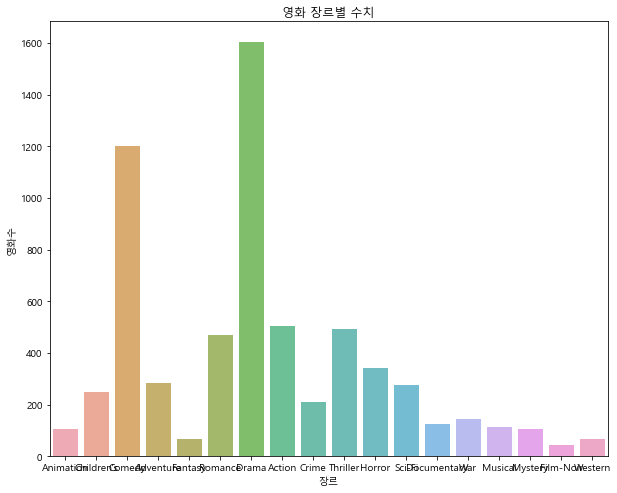

In [18]:
# 장르의 속성을 그래프로 그린다.
sns.barplot(list(unique_genre_dict.keys()), list(unique_genre_dict.values()), alpha=0.8)
plt.title('영화 장르별 수치')
plt.ylabel('영화수')
plt.xlabel('장르')
plt.show()

---

#### 전체 사용자 수를 파악한다.

In [19]:
print(f'사용자 전체 로우의 수 : {len(user_data)}')
print(f'중복 제외한 사용자의 수 : {len(user_data["user_id"].unique())}')

사용자 전체 로우의 수 : 6040
중복 제외한 사용자의 수 : 6040


---

#### 사용자의 성별 수를 그래프로 시각화 한다.

In [20]:
user_data['gender']

0       F
1       M
2       M
3       M
4       M
       ..
6035    F
6036    F
6037    F
6038    F
6039    M
Name: gender, Length: 6040, dtype: object

In [21]:
# 가장 많이 등장한 장르의 속성을 추출한다.
# 장르들을 담을 딕셔너리
unique_gender_dict = {}

# 영화의 수 만큼 반복하면서 장르를 추출한다.
for row in user_data['gender']:
    # print(row)
    for genre_name in row:
        # print(genre_name)
        # 해당 장르로 저장된 것이 없다면
        if unique_gender_dict.get(genre_name) == None:
            unique_gender_dict[genre_name] = 1
        
        # 해당 장르로 저장된 것이 있다면
        else:
            unique_gender_dict[genre_name] = unique_gender_dict[genre_name] + 1

print(unique_gender_dict)

{'F': 1709, 'M': 4331}


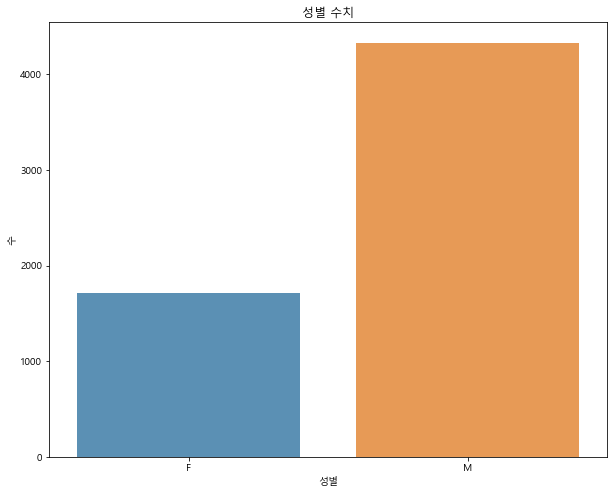

In [22]:
# 성별의 속성을 그래프로 그린다.
sns.barplot(list(unique_gender_dict.keys()), list(unique_gender_dict.values()), alpha=0.8)
plt.title('성별 수치')
plt.ylabel('수')
plt.xlabel('성별')
plt.show()

In [23]:
# 성별 별 사용자 수를 가져온다.
user_gender = user_data['gender'].value_counts()
user_gender

M    4331
F    1709
Name: gender, dtype: int64

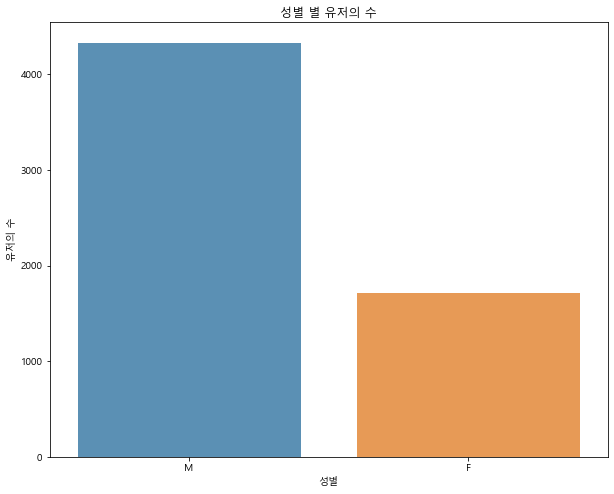

In [24]:
# 성별의 속성을 그래프로 그린다.
sns.barplot(user_gender.index,user_gender.values, alpha=0.8)
plt.title('성별 별 유저의 수')
plt.ylabel('유저의 수')
plt.xlabel('성별')
plt.show()

---

#### 연령대별 (10,20,30대) 사용자 수를 그래프로 시각화한다.
- 9세 이하는 outlier로 취급한다.
- 10 ~ 19세는 10, 
- 20 ~ 29세는 20 

In [25]:
# age 컬럼이 숫자인지 확인한다.
user_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6040 entries, 0 to 6039
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   user_id     6040 non-null   int64 
 1   gender      6040 non-null   object
 2   age         6040 non-null   int64 
 3   occupation  6040 non-null   int64 
 4   zipcode     6040 non-null   object
dtypes: int64(3), object(2)
memory usage: 236.1+ KB


In [26]:
# 연령대 분류 함수
def age_classification(age):
    if age < 10:
        return 'outlier'
    else:
        return str(age // 10 * 10)

In [27]:
user_data['ages'] = user_data['age'].apply(lambda x : age_classification(x))
user_data['ages']

0       outlier
1            50
2            20
3            40
4            20
         ...   
6035         20
6036         40
6037         50
6038         40
6039         20
Name: ages, Length: 6040, dtype: object

In [28]:
# 연령대별 유저수를 구한다.
user_ages = user_data['ages'].value_counts().sort_index()
user_ages

10         1103
20         2096
30         1193
40          550
50          876
outlier     222
Name: ages, dtype: int64

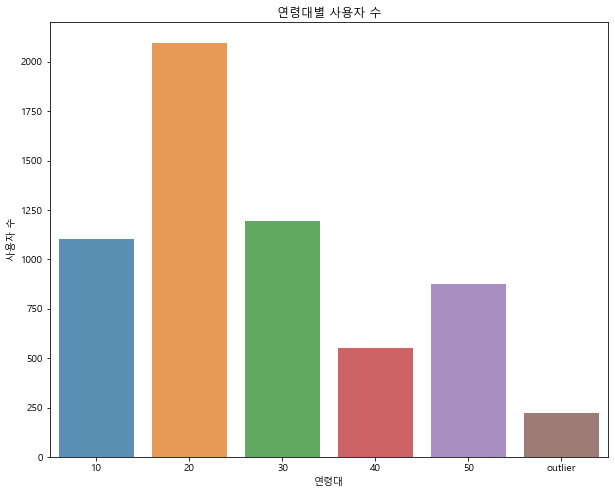

In [29]:
# 시각화
sns.barplot(user_ages.index, user_ages.values, alpha=0.8)
plt.title('연령대별 사용자 수')
plt.xlabel('연령대')
plt.ylabel('사용자 수')
plt.show()

#### 각 영화들이 평가받은 횟수를 탐색한다.

In [30]:
movie_rate_count = rating_data.groupby('movie_id')['rating'].count().values
movie_rate_count

array([2077,  701,  478, ...,   54,   40,  388], dtype=int64)

In [31]:
rating_data.groupby('movie_id')['rating'].count()

movie_id
1       2077
2        701
3        478
4        170
5        296
        ... 
3948     862
3949     304
3950      54
3951      40
3952     388
Name: rating, Length: 3706, dtype: int64

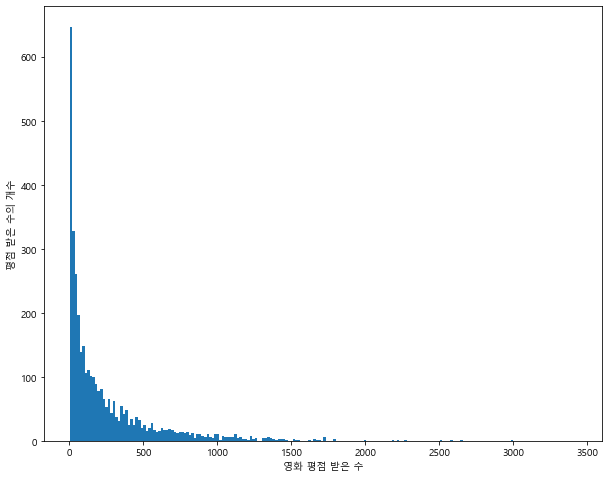

In [32]:
plt.hist(movie_rate_count,bins=200)
plt.ylabel('평점 받은 수의 개수')
plt.xlabel('영화 평점 받은 수')
plt.show()

# 평점이 0개인 데이터가 600개 이상

In [33]:
# 전체 영화 수
print(f'전체 영화 수: {len(movie_data)}')

# 평가를 100미만으로 받은 영화 수
print(f'평가를 100개 미만으로 받은 영화 수:  {len(movie_rate_count[movie_rate_count < 100])}')

전체 영화 수: 3883
평가를 100개 미만으로 받은 영화 수:  1687


In [34]:
# 영화별 평균 평점을 가져온다.
movie_grouped_rating_info = rating_data.groupby('movie_id')['rating'].agg(['count','mean'])
movie_grouped_rating_info.columns = ['rating_count','rating_mean']
movie_grouped_rating_info

,rating_count,rating_mean
movie_id,,
1,2077,4.146846
2,701,3.201141
3,478,3.016736
4,170,2.729412
5,296,3.006757
...,...,...
3948,862,3.635731
3949,304,4.115132
3950,54,3.666667


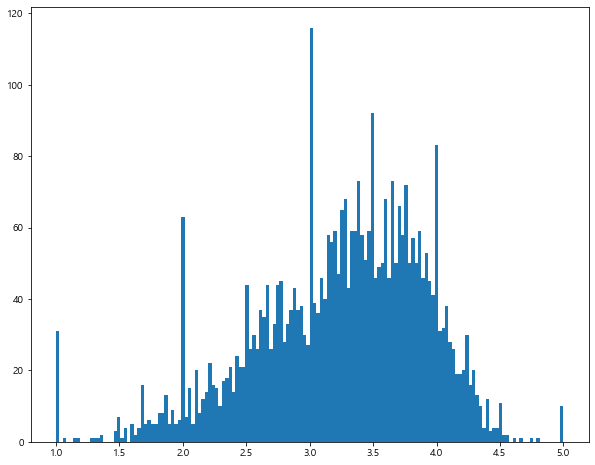

In [35]:
movie_grouped_rating_info['rating_mean'].hist(bins=150,grid=False)
plt.show()

In [37]:
# 100번 이상의 평가를 받은 영화 중, 평점이 높은 10개의 영화를 가져온다.
# on : 지정된 컬럼의 값이 같은 것 끼리만 가져온다.
# how : left, right, 결측치로 셋팅할 데이터프레임 지정

a1= movie_grouped_rating_info.merge(movie_data, on=['movie_id'], how='left')
a1.head()


,movie_id,rating_count,rating_mean,title,genre,year,year_term
0,1,2077,4.146846,Toy Story (1995),Animation|Children's|Comedy,1995,1990
1,2,701,3.201141,Jumanji (1995),Adventure|Children's|Fantasy,1995,1990
2,3,478,3.016736,Grumpier Old Men (1995),Comedy|Romance,1995,1990
3,4,170,2.729412,Waiting to Exhale (1995),Comedy|Drama,1995,1990
4,5,296,3.006757,Father of the Bride Part II (1995),Comedy,1995,1990


In [38]:
# 평가를 받은 횟수가 100 이상인 영화정보를 가져온다.
a2 = a1.query('rating_count >=100')
a2

,movie_id,rating_count,rating_mean,title,genre,year,year_term
0,1,2077,4.146846,Toy Story (1995),Animation|Children's|Comedy,1995,1990
1,2,701,3.201141,Jumanji (1995),Adventure|Children's|Fantasy,1995,1990
2,3,478,3.016736,Grumpier Old Men (1995),Comedy|Romance,1995,1990
3,4,170,2.729412,Waiting to Exhale (1995),Comedy|Drama,1995,1990
4,5,296,3.006757,Father of the Bride Part II (1995),Comedy,1995,1990
...,...,...,...,...,...,...,...
3690,3937,135,2.940741,Runaway (1984),Sci-Fi|Thriller,1984,1980
3699,3946,100,2.260000,Get Carter (2000),Action|Drama|Thriller,2000,2000
3701,3948,862,3.635731,Meet the Parents (2000),Comedy,2000,2000
3702,3949,304,4.115132,Requiem for a Dream (2000),Drama,2000,2000


In [40]:
# 평균 평점과 영화 제목을 가져온다.
a2.sort_values(by='rating_mean', inplace=True, ascending=False)
a2[['rating_mean', 'title']].head(10)

,rating_mean,title
1839,4.560510,Seven Samurai (The Magnificent Seven) (Shichin...
309,4.554558,"Shawshank Redemption, The (1994)"
802,4.524966,"Godfather, The (1972)"
708,4.520548,"Close Shave, A (1995)"
49,4.517106,"Usual Suspects, The (1995)"
513,4.510417,Schindler's List (1993)
1066,4.507937,"Wrong Trousers, The (1993)"
861,4.491489,Sunset Blvd. (a.k.a. Sunset Boulevard) (1950)
1108,4.477725,Raiders of the Lost Ark (1981)
843,4.476190,Rear Window (1954)


---

#### 실습 예제
- 위에서 한것과 동일한 방법으로
- 사용자별로 평가한 영화 개수
- 사용자별로 평가한 평균 영화 점수
- 사용자별로 평가한 영화 점수의 편차

#### 사용자별로 평가한 영화 개수

In [53]:
user_grouped_rating_info = rating_data.groupby('user_id')['rating'].agg(['count','mean','std'])
user_grouped_rating_info.columns = ['rated_count','rated_mean','rated_std']
user_grouped_rating_info

,rated_count,rated_mean,rated_std
user_id,,,
1,53,4.188679,0.680967
2,129,3.713178,1.001513
3,51,3.901961,0.984985
4,21,4.190476,1.077917
5,198,3.146465,1.132699
...,...,...,...
6036,888,3.302928,1.023684
6037,202,3.717822,0.877910
6038,20,3.800000,1.105013


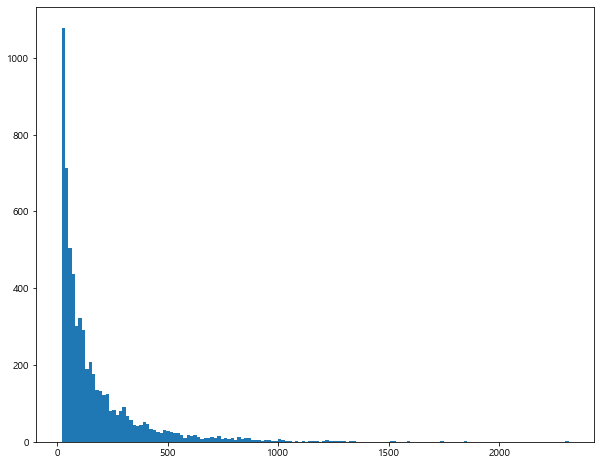

In [61]:
# 유저별로 평가한 영화 개수의 분포
# hist 중갑값을 기준으로 값의 분포를 알아봄
user_grouped_rating_info['rated_count'].hist(bins=150, grid=False)
plt.show()

평점을 안주는 사람이 많다는 것을 알수 있음

#### 사용자별로 평가한 평균 영화 점수

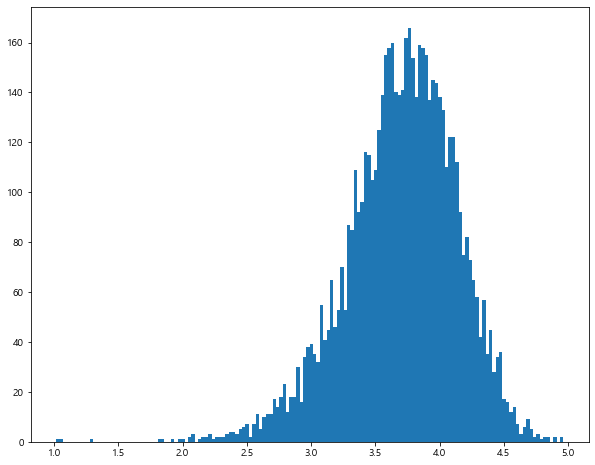

In [58]:
user_grouped_rating_info['rated_mean'].hist(bins=150,grid=False)
plt.show()

평점이 4.0에 분포한다는 것을 알수 있음

#### 사용자별로 평가한 영화 점수의 편차

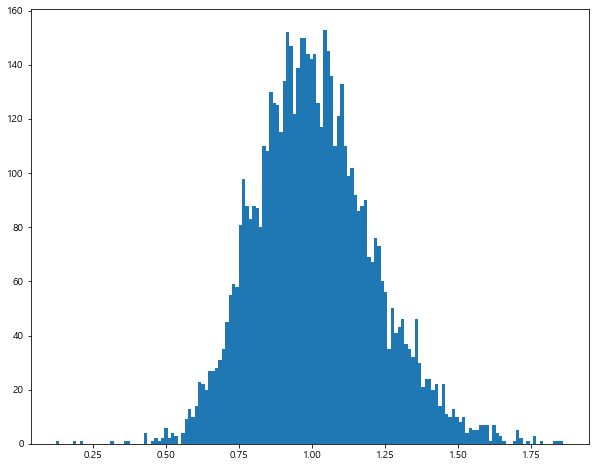

In [59]:
user_grouped_rating_info['rated_std'].hist(bins=150,grid=False)
plt.show()

#### user movie 형태의 테이블로 살펴보기

In [63]:
rating_data

,user_id,movie_id,rating,time
0,1,1193,5,978300760
1,1,661,3,978302109
2,1,914,3,978301968
3,1,3408,4,978300275
4,1,2355,5,978824291
...,...,...,...,...
1000204,6040,1091,1,956716541
1000205,6040,1094,5,956704887
1000206,6040,562,5,956704746
1000207,6040,1096,4,956715648


In [66]:
# unstack() 함수로 user_id, movie_id를 축으로 하는 데이터를 생성한다.
a1 = rating_data[['user_id','movie_id','rating']]
# display(a1)

# user_id와 movie_id를 인덱스로 테이블을 만든다
a2 = a1.set_index(['user_id','movie_id'])
# display(a2)

# movie_id에 값을 주지 않은 곳은 결측치로 채움
rating_table = a2.unstack()
rating_table

rating                                               ...            \
movie_id   1    2    3    4    5    6    7    8    9    10    ... 3943 3944   
user_id                                                       ...             
1           5.0  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  ...  NaN  NaN   
2           NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  ...  NaN  NaN   
3           NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  ...  NaN  NaN   
4           NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  ...  NaN  NaN   
5           NaN  NaN  NaN  NaN  NaN  2.0  NaN  NaN  NaN  NaN  ...  NaN  NaN   
...         ...  ...  ...  ...  ...  ...  ...  ...  ...  ...  ...  ...  ...   
6036        NaN  NaN  NaN  2.0  NaN  3.0  NaN  NaN  NaN  NaN  ...  NaN  NaN   
6037        NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  ...  NaN  NaN   
6038        NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  ...  NaN  NaN   
6039        NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  ...  NaN  NaN   
6040        3.0  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  ...  NaN  NaN   

                                                  
movie_id 3945 3946 3947 3948 3949 3950 3951 3952  
user_id                                           
1         NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  
2         NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  
3         NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  
4         NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  
5         NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  
...       ...  ...  ...  ...  ...  ...  ...  ...  
6036      NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  
6037      NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  
6038      NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  
6039      NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  
6040      NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  

[6040 rows x 3706 columns]

### 수학적 기법을 활용한 평점 예측
- pip install surprise
- 추천시스템을 위해 만들어진 라이브러리

In [68]:
from surprise import SVD, Dataset, Reader, accuracy
from surprise.model_selection import train_test_split

In [70]:
# test
# 데이터 프레임을 생성한다.
ratings_dict = {
    'item_id' : [1, 2, 3, 1, 2, 3, 2],
    'user_id' : ['a', 'a', 'a', 'b', 'b', 'b', 'c'],
    'rating' : [2, 4, 4, 2, 5, 4, 5]
}
df = pd.DataFrame(ratings_dict)
df

,item_id,user_id,rating
0,1,a,2
1,2,a,4
2,3,a,4
3,1,b,2
4,2,b,5
5,3,b,4
6,2,c,5


In [75]:
# unstack 사용
# 순서를 사용자, 아이템, 평점에 맞게 정렬
a1 = df[['user_id','item_id','rating']]

a2 = a1.set_index(['user_id','item_id'])

a3 = a2.unstack()
display(a3)

# 결측치를 0으로 채워준다.
df_matrix_table = a3.fillna(0)
df_matrix_table

rating          
item_id      1    2    3
user_id                 
a          2.0  4.0  4.0
b          2.0  5.0  4.0
c          NaN  5.0  NaN

rating          
item_id      1    2    3
user_id                 
a          2.0  4.0  4.0
b          2.0  5.0  4.0
c          0.0  5.0  0.0

- Step 1 : 평점 순
- Step 2 : 유사도
- Step 3 : 성향

#### SVD 기반으로 빈칸 채워주기 (행렬 분해)

In [76]:
# 데이터를 읽어들이기 위한 객체
# rating_scale : 단위 점수 체계를 만듬 ex) (1,5) 1점당
reader = Reader(rating_scale=(1,5))

In [77]:
# 데이터 셋을 생성한다.
# 컬럼명은 정해져있음 
a1 = df[['user_id','item_id','rating']]
data = Dataset.load_from_df(df=a1, reader=reader)

In [79]:
# 학습용 데이터를 생성한다.
# suprise 라이브러리가 인식할 수 있는 학습 데이터셋을 구성한다.

train_data = data.build_full_trainset()
train_data

In [80]:
# SVD 모델로 학습한다.
model = SVD(n_factors=8, lr_all=0.005, reg_all=0.02, n_epochs=10)
model.fit(train_data)

In [81]:
# 학습한 모델을 기반으로 빈공간의 점수를 예측한다.
# build_anti_testset() : 학습에 사용된 데이터에서 0으로 평간되어 있는
# 부분의 데이터, user 혹은 item은 학습에 반드시 등장한 적이 있어야 한다는 전제조건

test_data = train_data.build_anti_testset()
test_data

[('c', 1, 3.7142857142857144), ('c', 3, 3.7142857142857144)]

In [82]:
# 예측
predictions = model.test(test_data)
predictions

[Prediction(uid='c', iid=1, r_ui=3.7142857142857144, est=3.6498871417387506, details={'was_impossible': False}),
 Prediction(uid='c', iid=3, r_ui=3.7142857142857144, est=3.807031844728792, details={'was_impossible': False})]

In [83]:
for _,ild, _, prediction_rating, _ in predictions:
    print(f'item_id {ild} : {prediction_rating}')

item_id 1 : 3.6498871417387506
item_id 3 : 3.807031844728792


### MovieLens 데이터에 적용
- 평점을 예측해서 영화를 추천해주는 모델 

In [86]:
# 평점 정보확인 .describe()
# 최소와 최대 정보만 확인 가능 .agg(['min','max'])
rating_data['rating'].agg(['min','max'])

# 최소가 1, 최대가 5인것을 확인

min    1
max    5
Name: rating, dtype: int64

In [87]:
# reader 생성
reader = Reader(rating_scale=(1,5))

# 데이터를 생성한다.
a1 = rating_data[['user_id','movie_id','rating']]
data = Dataset.load_from_df(a1, reader)
train_data = data.build_full_trainset()
train_data

In [88]:
# 학습한다.
train_start = time.time() # 현재시간 설정

model = SVD(n_factors = 8, lr_all=0.005, reg_all=0.02, n_epochs=100)
model.fit(train_data)

train_end = time.time()

print(f'총 학습 시간 : {train_end - train_start}')

총 학습 시간 : 58.703088998794556


In [89]:
# user_id가 4인 유저의 영화 평가데이터
target_user_id = 4
target_user_data = rating_data[rating_data['user_id'] == target_user_id]
target_user_data

,user_id,movie_id,rating,time
233,4,3468,5,978294008
234,4,1210,3,978293924
235,4,2951,4,978294282
236,4,1214,4,978294260
237,4,1036,4,978294282
238,4,260,5,978294199
239,4,2028,5,978294230
240,4,480,4,978294008
241,4,1196,2,978294199
242,4,1198,5,978294199


In [93]:
# 사용자 4가 평점 내린 영화 인덱스를 추출한다.
a1 = target_user_data[['movie_id','rating']]
# display(a1)

# movie_id와 rating을 담을 딕셔너리
target_user_movie_rating_dict = {}

for idx, row in a1.iterrows():
    movie_id = row['movie_id']
    target_user_movie_rating_dict[movie_id] = row['rating']
    
print(target_user_movie_rating_dict)

{3468: 5, 1210: 3, 2951: 4, 1214: 4, 1036: 4, 260: 5, 2028: 5, 480: 4, 1196: 2, 1198: 5, 1954: 5, 1097: 4, 3418: 4, 3702: 4, 2366: 4, 1387: 5, 3527: 1, 1201: 5, 2692: 5, 2947: 5, 1240: 5}


In [106]:
# 4번 사용자가 보지 않은 영화 인덱스를 담아준다.
test_data1= []

for index, row in movie_data.iterrows():
    # 영화 id를 추출한다.
    movie_id = row['movie_id']
    
    # 4번 사용자가 이 영화에 대해 평점을 주지 않았다면 리스트에 담는다.
    if movie_id not in target_user_movie_rating_dict:
        # rating은 0으로 준다.
        test_data1.append((target_user_id,movie_id,0))
# print(test_data1)

In [111]:
# 점수를 예측한다.
target_user_predictions = model.test(test_data1)

for _, movie_id, _, rating, _ in target_user_predictions:
    a1 = movie_data.query(f'movie_id == {movie_id}')
    a2 = a1['title'].values[0]
    # print(f'{a2} : {round(rating,1)}')

In [116]:
# 4번 사용자게에 영화 10개를 추천해준다.

# 예측된 점수를 통해 데이터 프레임을 생성한다.
predict_dict = {
    'movie_id' : [],
    'rating' : []
}

# 담는다.
for _, movie_id, _, rating, _ in target_user_predictions:
    predict_dict['movie_id'].append(movie_id)
    predict_dict['rating'].append(round(rating,1))

# print(predict_dict)

# 데이터 프레임으로 만든다.
predict_df = pd.DataFrame(predict_dict)
predict_df.sort_values(by='rating', inplace=True, ascending=False)
predict_df.head(10)

,movie_id,rating
1168,1189,5.0
894,908,5.0
1186,1212,5.0
3647,3737,5.0
2104,2186,5.0
3540,3629,5.0
52,53,5.0
1869,1949,5.0
3049,3135,5.0
3048,3134,5.0


In [123]:
# 상위 10개만 추출한다.
a2 = predict_df.head(10)

# 추출한 상위 10개 영화의 movie_id를 추출한다.
idx = a2['movie_id'].values

# 추출한 10개의 영화 수만큼 반복한다.
for movie_id in idx:
    # 추천된 id의 영화 이름을 추출해 출력한다.
    a1 = movie_data.query(f'movie_id == {movie_id}')
    print(a1['title'].values[0])

Thin Blue Line, The (1988)
North by Northwest (1959)
Third Man, The (1949)
Lonely Are the Brave (1962)
Strangers on a Train (1951)
Gold Rush, The (1925)
Lamerica (1994)
Man for All Seasons, A (1966)
Great Santini, The (1979)
Grand Illusion (Grande illusion, La) (1937)
